In [1]:
import rasterio
import matplotlib.pyplot as plt
import geopandas as gpd
from rasterio.plot import show
from matplotlib.widgets import Slider

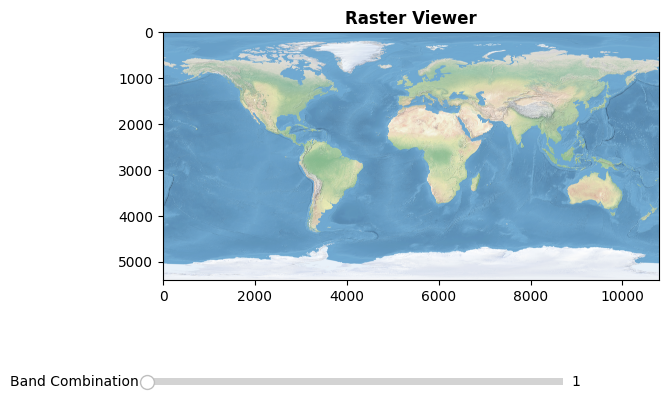

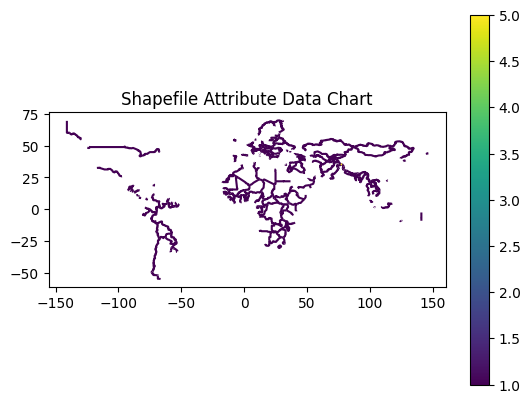

In [2]:
class RasterViewer:
    def __init__(self, raster_path, shapefile_path=None):
        self.raster_path = raster_path
        self.shapefile_path = shapefile_path
        self.band_combination = (1, 2, 3)

        self.load_raster_data()
        self.load_shapefile_data()

        self.plot_raster()
        self.plot_shapefile_chart()

        plt.show()

    def load_raster_data(self):
        with rasterio.open(self.raster_path) as src:
            self.raster_data = src.read()

    def load_shapefile_data(self):
        if self.shapefile_path:
            self.shapefile_data = gpd.read_file(self.shapefile_path)

    def plot_raster(self):
        fig, ax = plt.subplots()
        show(self.raster_data, ax=ax, cmap='viridis', title='Raster Viewer')

        ax_band_slider = plt.axes([0.1, 0.01, 0.65, 0.03], facecolor='lightgoldenrodyellow')
        band_slider = Slider(ax_band_slider, 'Band Combination', 1, self.raster_data.shape[0], valinit=1, valstep=1)

        def update(val):
            band = int(band_slider.val)
            self.band_combination = (band, (band % self.raster_data.shape[0]) + 1, ((band + 1) % self.raster_data.shape[0]) + 1)
            ax.clear()
            show(self.raster_data[self.band_combination, :, :], ax=ax, cmap='viridis', title='Raster Viewer')

        band_slider.on_changed(update)

    def plot_shapefile_chart(self):
        if self.shapefile_path:
            fig, ax = plt.subplots()
            self.shapefile_data.plot(column=self.shapefile_data.columns[0], legend=True, ax=ax)
            plt.title('Shapefile Attribute Data Chart')

if __name__ == "__main__":
    raster_path = "NE2_50M_SR_W.tif"
    shapefile_path = "ne_50m_admin_0_boundary_lines_land.shp"

    viewer = RasterViewer(raster_path, shapefile_path)
